In [1]:
import numpy as np
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
myColor = list(mcolors.CSS4_COLORS)

from pygama.dsp.errors import DSPFatal
import pygama.lgdo.lh5_store as lh5


In [2]:
# DIRECTORY FOR PHYSICS DATA:
raw_dir='/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/raw/phy/p01/r027/'
dsp_dir='/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/dsp/phy/p01/r027/'
hit_dir='/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/hit/phy/p01/r027/'
tcm_dir='/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/tcm/phy/p01/r027/'
# DIRECTORY FOR CALIBRATION DATA:
# raw_dir = '/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/raw/cal/p01/r027/'
# dsp_dir = '/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/dsp/cal/p01/r027/'
# hit_dir = '/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/hit/cal/p01/r027/'
#tcm_dir = '/data1/shared/l60/l60-prodven-v1/prod-ref/v06.00/generated/tier/tcm/cal/p01/r027/'
# # SAMPLE DATA FILES
# raw_file = raw_dir+"l60-p01-r027-cal-20220923T165106Z-tier_raw.lh5" 
# dsp_file = raw_dir+"l60-p01-r026-phy-20220923T095129Z-tier_raw.lh5"
# hit_file = raw_dir+"l60-p01-r026-phy-20220923T095129Z-tier_raw.lh5"
# tcm_file = raw_dir+"l60-p01-r026-phy-20220923T095129Z-tier_raw.lh5

In [3]:
#List of all available channels, where ch000=pulse, ch001=muon, ch003=Ge, ...
channel= ['ch000', 'ch001', 
          'ch002', 'ch003', 'ch004', 'ch005', 'ch006', 'ch007', 'ch008', 'ch009', 'ch010', 
          'ch011', 'ch012', 'ch013', 'ch014', 'ch015', 'ch016', 'ch017', 'ch018', 'ch019', 'ch020', 'ch021', 
          'ch022', 'ch023', 'ch024', 'ch025', 'ch026', 'ch027', 'ch028', 'ch029', 'ch030', 'ch031', 'ch032', 
          'ch033', 'ch034', 'ch035', 'ch036', 'ch037', 'ch038', 'ch039', 'ch040', 'ch041', 'ch042', 'ch043', 
          'ch044', 'ch045', 'ch046', 'ch047', 'ch048', 'ch049', 'ch050', 'ch051', 'ch052', 'ch053', 'ch054', 
          'ch055', 'ch056', 'ch057', 'ch058', 'ch059', 'ch060', 'ch061', 'ch062', 'ch063', 'ch064', 'ch065', 
          'ch066', 'ch067', 'ch068', 'ch069', 'ch070', 'ch071', 'ch072', 'ch073', 'ch074', 'ch075', 'ch076', 
          'ch077', 'ch078', 'ch079', 'ch080', 'ch081', 'ch082', 'ch083', 'ch084', 'ch085', 'ch086', 'ch087', 
          'ch088', 'ch089', 'ch090', 'ch091', 'ch092', 'ch093', 'ch094', 'ch095', 'ch096', 'ch097', 'ch098', 
          'ch099', 'ch100', 'ch101', 'ch102', 'ch103', 'ch104', 'ch105', 'ch106', 'ch107', 'ch108', 'ch109']
string1= ["ch023","ch024","ch025","ch026","ch027","ch028","ch029","ch016"]
string2= ["ch009","ch010","ch011","ch012","ch013","ch014","ch015"]
string7= ["ch037","ch038","ch039","ch040","ch041","ch042","ch007","ch043"]
string8= ["ch002","ch003","ch008","ch005","ch006"]

list_of_Ge_channels= ["ch023","ch024","ch025","ch026","ch027","ch028","ch029","ch016",
                      "ch009","ch010","ch011","ch012","ch013","ch014","ch015",
                      "ch037","ch038","ch039","ch040","ch041","ch042","ch007","ch043",
                      "ch002","ch003","ch008","ch005","ch006"]
print(len(list_of_Ge_channels))

28


In [4]:
# get the raw files
raw_files=os.listdir(raw_dir) # list of all phy lh5 files
raw_files.sort() # sort them according to time
for i,file in enumerate(raw_files): 
    raw_files[i] =os.path.join(raw_dir,file) # get the full path
    #get the dsp files
dsp_files=os.listdir(dsp_dir) # list of all phy lh5 files
dsp_files.sort() # sort them according to time
for i,file in enumerate(dsp_files): 
    dsp_files[i] =os.path.join(dsp_dir,file) # get the full path

    #get the hit files
hit_files=os.listdir(hit_dir) # list of all phy lh5 files
hit_files.sort() # sort them according to time
for i,file in enumerate(hit_files): 
    hit_files[i] =os.path.join(hit_dir,file) # get the full path

    #get the tcm files
tcm_files=os.listdir(tcm_dir) # list of all phy lh5 files
tcm_files.sort() 
# sort them according to time
for i,file in enumerate(tcm_files): 
    tcm_files[i] =os.path.join(tcm_dir,file) # get the full path

# print(len(raw_files), len(dsp_files), len(hit_files), len(tcm_files))

In [16]:
raw_channels = lh5.ls(raw_files[0])

In [17]:
print(raw_channels)

['ch000', 'ch001', 'ch002', 'ch003', 'ch004', 'ch005', 'ch006', 'ch007', 'ch008', 'ch009', 'ch010', 'ch011', 'ch012', 'ch013', 'ch014', 'ch015', 'ch016', 'ch017', 'ch018', 'ch019', 'ch020', 'ch021', 'ch022', 'ch023', 'ch024', 'ch025', 'ch026', 'ch027', 'ch028', 'ch029', 'ch030', 'ch031', 'ch032', 'ch033', 'ch034', 'ch035', 'ch036', 'ch037', 'ch038', 'ch039', 'ch040', 'ch041', 'ch042', 'ch043', 'ch044', 'ch045', 'ch046', 'ch047', 'ch048', 'ch049', 'ch050', 'ch051', 'ch052', 'ch053', 'ch054', 'ch055', 'ch056', 'ch057', 'ch058', 'ch059', 'ch060', 'ch061', 'ch062', 'ch063', 'ch064', 'ch065', 'ch066', 'ch067', 'ch068', 'ch069', 'ch070', 'ch071', 'ch072', 'ch073', 'ch074', 'ch075', 'ch076', 'ch077', 'ch078', 'ch079', 'ch080', 'ch081', 'ch082', 'ch083', 'ch084', 'ch085', 'ch086', 'ch087', 'ch088', 'ch089', 'ch090', 'ch091', 'ch092', 'ch093', 'ch094', 'ch095', 'ch096', 'ch097', 'ch098', 'ch099', 'ch100', 'ch101', 'ch102', 'ch103', 'ch104', 'ch105', 'ch106', 'ch107', 'ch108', 'ch109']


In [7]:
lh5.ls(raw_files[0],'ch016/raw/')

['ch016/raw/baseline',
 'ch016/raw/card',
 'ch016/raw/ch_orca',
 'ch016/raw/channel',
 'ch016/raw/crate',
 'ch016/raw/daqenergy',
 'ch016/raw/deadtime',
 'ch016/raw/dr_maxticks',
 'ch016/raw/dr_start_pps',
 'ch016/raw/dr_start_ticks',
 'ch016/raw/dr_stop_pps',
 'ch016/raw/dr_stop_ticks',
 'ch016/raw/eventnumber',
 'ch016/raw/fcid',
 'ch016/raw/numtraces',
 'ch016/raw/packet_id',
 'ch016/raw/runtime',
 'ch016/raw/timestamp',
 'ch016/raw/to_abs_mu_usec',
 'ch016/raw/to_dt_mu_usec',
 'ch016/raw/to_master_sec',
 'ch016/raw/to_mu_sec',
 'ch016/raw/to_mu_usec',
 'ch016/raw/to_start_sec',
 'ch016/raw/to_start_usec',
 'ch016/raw/tracelist',
 'ch016/raw/ts_maxticks',
 'ch016/raw/ts_pps',
 'ch016/raw/ts_ticks',
 'ch016/raw/waveform']

In [52]:
print("In RAW: \n ")
show_raw = lh5.show(raw_files[0],"ch000")
# # choosing to show only the contents for ch000
# show_raw = lh5.show(raw_files[0])
# print("In DSP: \n ")
# show_dsp = lh5.show(dsp_files[0],"ch000")
print("In HIT: \n ")
show_hit = lh5.show(hit_files[0])
# print(" In TCM: \n ")
# show_tcm = lh5.show(tcm_files[0])

In RAW: 
 
ch000
└── raw · table{packet_id,eventnumber,timestamp,runtime,numtraces,tracelist,baseline,daqenergy,channel,ts_pps,ts_ticks,ts_maxticks,to_mu_sec,to_mu_usec,to_master_sec,to_dt_mu_usec,to_abs_mu_usec,to_start_sec,to_start_usec,dr_start_pps,dr_start_ticks,dr_stop_pps,dr_stop_ticks,dr_maxticks,deadtime,waveform,crate,card,ch_orca,fcid}
    ├── baseline · array<1>{real}
    ├── card · array<1>{real}
    ├── ch_orca · array<1>{real}
    ├── channel · array<1>{real}
    ├── crate · array<1>{real}
    ├── daqenergy · array<1>{real}
    ├── deadtime · array<1>{real}
    ├── dr_maxticks · array<1>{real}
    ├── dr_start_pps · array<1>{real}
    ├── dr_start_ticks · array<1>{real}
    ├── dr_stop_pps · array<1>{real}
    ├── dr_stop_ticks · array<1>{real}
    ├── eventnumber · array<1>{real}
    ├── fcid · array<1>{real}
    ├── numtraces · array<1>{real}
    ├── packet_id · array<1>{real}
    ├── runtime · array<1>{real}
    ├── timestamp · array<1>{real}
    ├── to_abs_mu_usec · a

In [24]:
# hit_channels = lh5.ls(hit_files[0])
# energy = np.array([])
# aoe = np.array([])
# aoe_pass = np.array([], dtype=bool)
# for channel in hit_channels:
#     try:
#         hit_data = lh5.load_nda(hit_files, 
#                         ["cuspEmax_ctc_cal", "AoE_Double_Sided_Cut", "AoE_Classifier"], f'{channel}/hit')
#         pulser_events = hit_data["AoE_Classifier"]>10
#         energy=np.append(energy, hit_data["cuspEmax_ctc_cal"])#[~pulser_events]
#         aoe_pass=np.append(aoe_pass, hit_data["AoE_Double_Sided_Cut"])
#         aoe=np.append(aoe, hit_data["AoE_Classifier"])
#         print(f"channel {channel} loaded")
#     except:
#         print(f" **** channel {channel} exclued")

In [43]:
# fig,ax = plt.subplots()
# bins = np.linspace(0,3000,3000)
# counts, edges, _ = ax.hist(energy, bins=bins, histtype='step', label='After quality cuts')
# counts_pass, edges_pass, _ = ax.hist(energy[aoe_pass], bins=bins, histtype='step', label="After quality cuts and pulse shape discrimination cut")
# ax.set_yscale('log')
# plt.xlabel("Energy (keV)")
# plt.ylabel("Counts / keV")
# plt.legend()
# plt.xlim(1400,1800)
# # Count the number of events in the 1460 keV region
# region_counts = np.sum((energy >= 1455) & (energy <= 1465))
# region_counts_pass = np.sum((energy[aoe_pass] >= 1455) & (energy[aoe_pass] <= 1465))
# print(f"Number of events in the 1460 +- 5 keV region: {region_counts}")
# print(f"Number of events passing the pulse shape discrimination cut in the 1460 +- 5 keV region: {region_counts_pass}")

# plt.show()


In [44]:
sto=lh5.LH5Store()

In [45]:
sto=lh5.LH5Store()
wfs = sto.read_object("ch087/raw/waveform", raw_files[0])

In [46]:
wfs

(WaveformTable(dict={'t0': Array([0. 0. ... 0. 0.], attrs={'datatype': 'array<1>{real}', 'units': 'ns'}), 'dt': Array([16. 16. ... 16. 16.], attrs={'datatype': 'array<1>{real}', 'units': 'ns'}), 'values': ArrayOfEqualSizedArrays([[15104 15104 ... 15113 15119] [15107 15107 ... 15109 15108] ... [15107 15103 ... 15102 15113] [15106 15112 ... 15112 15107]], attrs={'datatype': 'array_of_equalsized_arrays<1,1>{real}'})}, attrs={'datatype': 'table{t0,dt,values}'}),
 3080)

In [47]:
type(wfs)

tuple

In [48]:
len(wfs)

2

In [49]:
print(type(wfs[0]),type(wfs[1]))

<class 'pygama.lgdo.waveform_table.WaveformTable'> <class 'int'>


In [50]:
len(wfs[0])

3080

In [51]:
print(len(wfs[0]['t0']), len(wfs[0]['dt']),len(wfs[0]['values']))

3080 3080 3080


In [53]:
wfs[0]['values']

ArrayOfEqualSizedArrays([[15104 15104 15099 ... 15114 15113 15119]
                         [15107 15107 15105 ... 15108 15109 15108]
                         [15105 15105 15119 ... 15110 15113 15111]
                         ...
                         [15118 15118 15113 ... 15111 15113 15108]
                         [15107 15103 15117 ... 15111 15102 15113]
                         [15106 15112 15113 ... 15118 15112 15107]], attrs={'datatype': 'array_of_equalsized_arrays<1,1>{real}'})

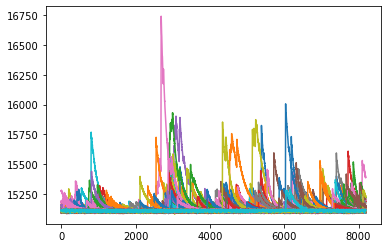

In [54]:
plt.figure()
for i in range(1000):
    plt.plot(wfs[0]["values"].nda[i])
plt.show()

In [19]:
hit_phy_channel = lh5.ls(hit_files[0])
print(hit_phy_channel)

['ch002', 'ch003', 'ch005', 'ch006', 'ch007', 'ch008', 'ch009', 'ch011', 'ch012', 'ch013', 'ch014', 'ch015', 'ch016', 'ch023', 'ch025', 'ch026', 'ch027', 'ch028', 'ch029', 'ch037', 'ch038', 'ch039', 'ch040', 'ch042', 'ch043', 'ch046', 'ch048', 'ch051', 'ch052', 'ch053', 'ch054', 'ch055', 'ch056', 'ch057', 'ch058', 'ch059', 'ch060', 'ch061', 'ch062', 'ch063', 'ch064', 'ch065', 'ch066', 'ch067', 'ch068', 'ch069', 'ch074', 'ch075', 'ch076', 'ch077', 'ch078', 'ch079', 'ch082', 'ch084', 'ch086', 'ch087', 'ch088', 'ch089', 'ch090', 'ch092', 'ch093', 'ch094', 'ch095', 'ch096', 'ch097', 'ch098', 'ch099', 'ch100', 'ch101', 'ch102', 'ch103']


In [18]:
#### listing the parameters saved in raw file
ls_raw=lh5.ls(raw_files[0],'ch003/raw/')
ls_dsp=lh5.ls(dsp_files[0],'ch003/dsp/')
ls_hit=lh5.ls(hit_files[0],'ch003/hit/')
ls_tcm=lh5.ls(tcm_files[0])
raw_params= [x[10:] for x in ls_raw]
dsp_params= [x[10:] for x in ls_dsp]
hit_params= [x[10:] for x in ls_hit]
tcm_params= [x for x in ls_tcm]
print('Parameters in raw file are : ',raw_params,'\n')
print('Parameters in dsp file are : ',dsp_params,'\n')
print('Parameters in hit file are : ',hit_params,'\n')
print('Parameters in tcm file are : ',tcm_params,'\n')

Parameters in raw file are :  ['baseline', 'card', 'ch_orca', 'channel', 'crate', 'daqenergy', 'deadtime', 'dr_maxticks', 'dr_start_pps', 'dr_start_ticks', 'dr_stop_pps', 'dr_stop_ticks', 'eventnumber', 'fcid', 'numtraces', 'packet_id', 'runtime', 'timestamp', 'to_abs_mu_usec', 'to_dt_mu_usec', 'to_master_sec', 'to_mu_sec', 'to_mu_usec', 'to_start_sec', 'to_start_usec', 'tracelist', 'ts_maxticks', 'ts_pps', 'ts_ticks', 'waveform'] 

Parameters in dsp file are :  ['A_max', 'QDrift', 'baseline', 'bl_intercept', 'bl_mean', 'bl_slope', 'bl_std', 'cuspEftp', 'cuspEmax', 'dt_eff', 'dt_eff_invert', 'pz_mean', 'pz_slope', 'pz_std', 'sat_hi', 'sat_lo', 't_discharge', 't_saturated', 'timestamp', 'tp_01', 'tp_0_atrap', 'tp_0_est', 'tp_0_invert', 'tp_10', 'tp_100', 'tp_100_invert', 'tp_10_invert', 'tp_20', 'tp_20_invert', 'tp_50', 'tp_50_invert', 'tp_80', 'tp_80_invert', 'tp_90', 'tp_90_invert', 'tp_95', 'tp_99', 'tp_99_invert', 'tp_aoe_max', 'tp_aoe_samp', 'tp_max', 'tp_min', 'trapEftp', 'trapEma

In [55]:
#### listing the parameters saved in raw file
ls_raw=lh5.ls(raw_files[0],'ch103/raw/')
ls_dsp=lh5.ls(dsp_files[0],'ch103/dsp/')
ls_hit=lh5.ls(hit_files[0],'ch103/hit/')
ls_tcm=lh5.ls(tcm_files[0])
raw_params= [x[10:] for x in ls_raw]
dsp_params= [x[10:] for x in ls_dsp]
hit_params= [x[10:] for x in ls_hit]
tcm_params= [x for x in ls_tcm]
print('Parameters in raw file are : ',raw_params,'\n')
print('Parameters in dsp file are : ',dsp_params,'\n')
print('Parameters in hit file are : ',hit_params,'\n')
print('Parameters in tcm file are : ',tcm_params,'\n')

Parameters in raw file are :  ['baseline', 'card', 'ch_orca', 'channel', 'crate', 'daqenergy', 'deadtime', 'dr_maxticks', 'dr_start_pps', 'dr_start_ticks', 'dr_stop_pps', 'dr_stop_ticks', 'eventnumber', 'fcid', 'numtraces', 'packet_id', 'runtime', 'timestamp', 'to_abs_mu_usec', 'to_dt_mu_usec', 'to_master_sec', 'to_mu_sec', 'to_mu_usec', 'to_start_sec', 'to_start_usec', 'tracelist', 'ts_maxticks', 'ts_pps', 'ts_ticks', 'waveform'] 

Parameters in dsp file are :  ['energies', 'timestamp', 'trigger_pos'] 

Parameters in hit file are :  ['energy_in_pe', 'quality_cut', 'timestamp', 'trigger_pos'] 

Parameters in tcm file are :  ['hardware_tcm'] 



In [20]:
my_params = ['baseline','card','ch_orca','channel','crate','timestamp','daqenergy']
info_dict = {}
for iCh in hit_phy_channel:
    values = lh5.load_nda(raw_files[0],my_params,f'{iCh}/raw/')
    info_dict[iCh]=values 

In [21]:
my_raw_params = ['fcid','card','ch_orca','channel','crate']
raw_info_dict = {}
for iCh in hit_phy_channel:
    raw_values = lh5.load_nda(raw_files[0],my_raw_params,f'{iCh}/raw/')
    raw_info_dict[iCh]=raw_values 

In [22]:
# raw_info_dict

In [23]:
# raw_info_table=pd.DataFrame.from_dict({(i,j):raw_info_dict[i][j][0] for i in info_dict.keys() for j in raw_info_dict[i].keys()}, orient='index')
# print(raw_info_table.to_string())

In [24]:
raw_info_table=pd.DataFrame.from_dict({k:[v['card'][0],v['fcid'][0],v['channel'][0],v['crate'][0]] for k,v in raw_info_dict.items()}, 
                                      orient='index',columns=['card','fcid','channel','crate'])
print(raw_info_table.to_string())

       card  fcid  channel  crate
ch002     1     1        2      0
ch003     1     1        3      0
ch005     1     1        5      0
ch006     1     1        6      0
ch007     1     1        7      0
ch008     2     1        8      0
ch009     2     1        9      0
ch011     2     1       11      0
ch012     2     1       12      0
ch013     2     1       13      0
ch014     3     1       14      0
ch015     3     1       15      0
ch016     4     1       16      0
ch023     5     1       23      0
ch025     6     1       25      0
ch026     6     1       26      0
ch027     6     1       27      0
ch028     6     1       28      0
ch029     6     1       29      0
ch037     8     1       37      0
ch038     8     1       38      0
ch039     8     1       39      0
ch040     8     1       40      0
ch042     8     1       42      0
ch043     9     1       43      0
ch046     1     1       46      2
ch048     1     1       48      2
ch051     2     1       51      2
ch052     2   

In [25]:
values = lh5.load_nda(raw_files[10],my_params,'ch087/raw/')
values

{'baseline': array([15109, 15110, 15110, ..., 15109, 15111, 15110], dtype=uint16),
 'card': array([8, 8, 8, ..., 8, 8, 8], dtype=uint8),
 'ch_orca': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'channel': array([87, 87, 87, ..., 87, 87, 87], dtype=uint32),
 'crate': array([2, 2, 2, ..., 2, 2, 2], dtype=uint8),
 'timestamp': array([1.6640132e+09, 1.6640132e+09, 1.6640132e+09, ..., 1.6640168e+09,
        1.6640168e+09, 1.6640168e+09]),
 'daqenergy': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)}

In [27]:
print("Number of files in this run: ",len(raw_files))
print("Number of waveforms saved in this file",len(values["baseline"]))

Number of files in this run:  215
Number of waveforms saved in this file 3496


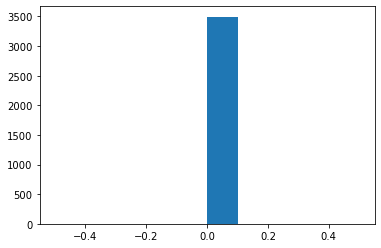

In [29]:
plt.hist(values['daqenergy'])
plt.show()

In [30]:
values["timestamp"][-1] - values["timestamp"][0]

3596.772943019867

In [31]:
from pygama.vis.waveform_browser import WaveformBrowser

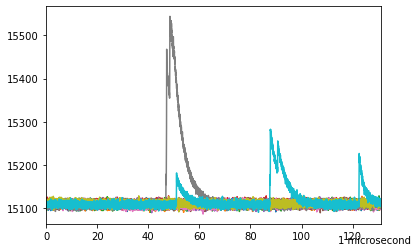

In [32]:
browser = WaveformBrowser(raw_files[10],'ch087/raw/',x_unit='us',styles={'color':list(mcolors.TABLEAU_COLORS)})
browser.draw_entry([1,2,3,4,5,6,7,8,9,10])

In [35]:
event_num = sto.read_object("ch001/raw/eventnumber", raw_files[0])

In [36]:
type(event_num)

tuple

In [37]:
event_num

(Array([   0    1    2 ... 3077 3078 3079], attrs={'datatype': 'array<1>{real}'}),
 3080)

In [57]:
sto=lh5.LH5Store()
sipm_attr = sto.read_object("ch087/hit", hit_files[0])

In [58]:
sipm_attr

(Table(dict={'energy_in_pe': ArrayOfEqualSizedArrays([[0.96128695 nan ... nan nan] [0.14697511 nan ... nan nan] ... [1.25615081 nan ... nan nan] [1.3738722 2.1396936 ... nan nan]], attrs={'datatype': 'array_of_equalsized_arrays<2>{real}'}), 'quality_cut': ArrayOfEqualSizedArrays([[ True False ... False False] [False False ... False False] ... [ True False ... False False] [ True True ... False False]], attrs={'datatype': 'array_of_equalsized_arrays<2>{bool}'}), 'trigger_pos': ArrayOfEqualSizedArrays([[1575. nan ... nan nan] [ 619. nan ... nan nan] ... [3151. nan ... nan nan] [2928. 2948. ... nan nan]], attrs={'datatype': 'array_of_equalsized_arrays<2>{real}'}), 'timestamp': Array([1.66397717e+09 1.66397718e+09 ... 1.66398077e+09 1.66398077e+09], attrs={'datatype': 'array<1>{real}', 'units': 's'})}, attrs={'datatype': 'table{energy_in_pe,quality_cut,trigger_pos,timestamp}'}),
 3080)

In [40]:
type(sipm_attr)

tuple

In [41]:
type(sipm_attr[0])

pygama.lgdo.table.Table

In [56]:
sipm_attr[0]['energy_in_pe'].nda[10]

NameError: name 'sipm_attr' is not defined

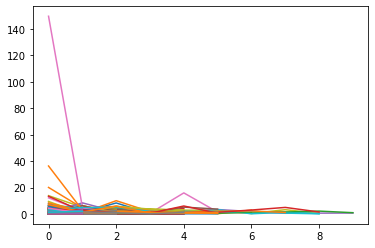

In [115]:
plt.figure()
for i in range(3080):
    plt.plot(sipm_attr[0]["energy_in_pe"].nda[i])
plt.show()

In [119]:
for i in range(3080):
    pe = sipm_attr[0]['energy_in_pe'].nda[i][0]
    if pe>30:
        print(i, pe)
    

1543 135.84660265624998
1886 149.5784740625
2361 36.33661191833495


In [117]:
wfs

(WaveformTable(dict={'t0': Array([0. 0. ... 0. 0.], attrs={'datatype': 'array<1>{real}', 'units': 'ns'}), 'dt': Array([16. 16. ... 16. 16.], attrs={'datatype': 'array<1>{real}', 'units': 'ns'}), 'values': ArrayOfEqualSizedArrays([[15104 15104 ... 15113 15119] [15107 15107 ... 15109 15108] ... [15107 15103 ... 15102 15113] [15106 15112 ... 15112 15107]], attrs={'datatype': 'array_of_equalsized_arrays<1,1>{real}'})}, attrs={'datatype': 'table{t0,dt,values}'}),
 3080)

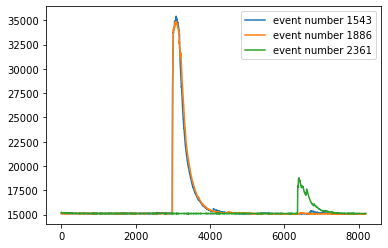

In [122]:
maxwf=(1543,1886,2361)
for i in maxwf:
    plt.plot(wfs[0]['values'].nda[i], label=f"event number {i}")
    plt.legend()
plt.show()

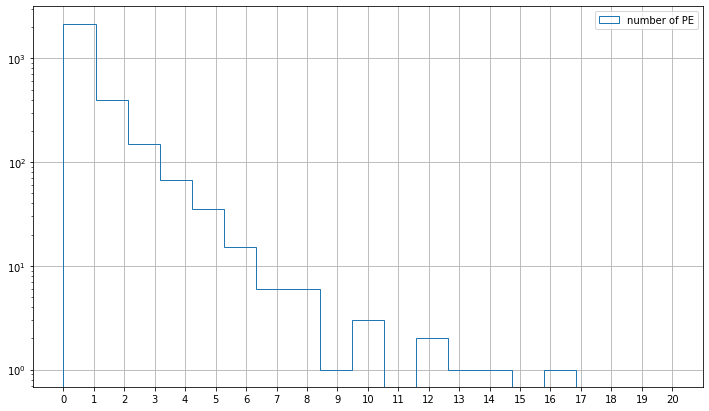

In [144]:
sipm_data = lh5.load_nda(hit_files[0],['energy_in_pe','trigger_pos','timestamp','quality_cut'],'ch087/hit')
fig,ax = plt.subplots(figsize=(12,7))
bins = np.linspace(0,20,20)
npe = sipm_data["energy_in_pe"]
npe_withou_nan = npe[~np.isnan(npe)]
ax.hist(npe_withou_nan, bins=bins, histtype='step', label='number of PE')
ax.legend()
ax.set_yscale("log")
ax.set_xticks(np.arange(0,21))
ax.grid()
plt.show()

In [125]:
npe

array([[0.96128695,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.14697511,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.15770448,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.9493798 , 1.66712734, 0.99618972, ...,        nan,        nan,
               nan],
       [1.25615081,        nan,        nan, ...,        nan,        nan,
               nan],
       [1.3738722 , 2.1396936 ,        nan, ...,        nan,        nan,
               nan]])

(array([1., 0., 0., 0., 0., 2., 1., 0., 0., 1.]),
 array([0.15756084, 0.30851749, 0.45947414, ..., 1.36521404, 1.51617069,
        1.66712734]),
 <BarContainer object of 10 artists>)

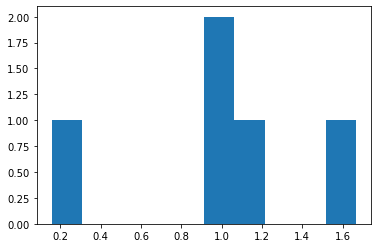

In [86]:
plt.hist(npe[3077])

In [138]:
sipm_attr[0]["timestamp"]

Array([1.66397717e+09 1.66397718e+09 1.66397718e+09 ... 1.66398077e+09
       1.66398077e+09 1.66398077e+09], attrs={'datatype': 'array<1>{real}', 'units': 's'})

In [143]:
sipm_attr[0]["trigger_pos"]

ArrayOfEqualSizedArrays([[1575.   nan   nan ...   nan   nan   nan]
                         [ 619.   nan   nan ...   nan   nan   nan]
                         [ 584.   nan   nan ...   nan   nan   nan]
                         ...
                         [3009. 3075. 3145. ...   nan   nan   nan]
                         [3151.   nan   nan ...   nan   nan   nan]
                         [2928. 2948.   nan ...   nan   nan   nan]], attrs={'datatype': 'array_of_equalsized_arrays<2>{real}'})

In [152]:
trig_pos = sipm_data["trigger_pos"]
# trig_pos = trig_pos[~np.isnan(trig_pos)]
trig_pos.shape

(3080, 100)

(array([312., 260., 287., 441., 261., 292., 289., 265., 223., 217.]),
 array([   0. ,  817.9, 1635.8, ..., 6543.2, 7361.1, 8179. ], dtype=float32),
 <BarContainer object of 10 artists>)

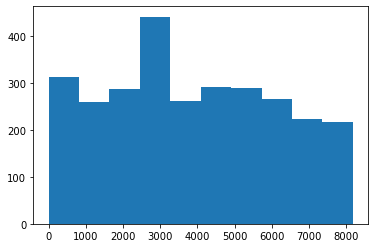

In [150]:
plt.hist(trig_pos)

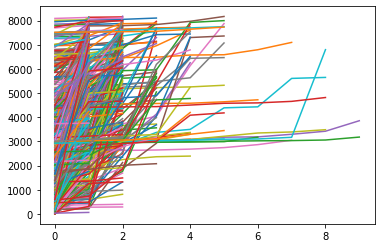

In [156]:
for i in range(3080):
    plt.plot(sipm_attr[0]["trigger_pos"].nda[i])